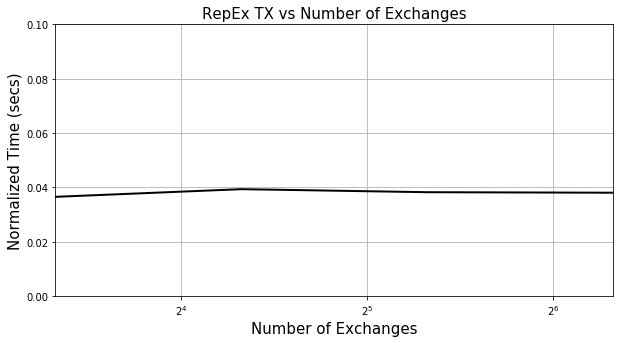

In [3]:
import os
import sys
import glob
import pprint
import radical.utils as ru
import radical.pilot as rp
import radical.entk as re
import radical.analytics as ra
import pickle
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np



sessionnames = [
               're.session.two.scm177.017719.0008', 
               're.session.two.scm177.017719.0010', 
               're.session.two.scm177.017719.0012', 
               're.session.two.scm177.017719.0014', 
                ]

ex_attempts = [10, 20, 40, 80]
timesteps = [20000, 40000, 80000, 160000]

NTX = [] #Normalized TTX by the number of timesteps 

wd = os.getcwd() 

#print wd

def gettimes(sessionname, timesteps):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)


    total                   = session.filter(etype='task', inplace=False)
    total_durations         = total.duration([re.states.SCHEDULED, re.states.DONE])
    NTX.append(total_durations/timesteps)

for i in range(4):    
    gettimes(sessionnames[i],timesteps[i])
    
    
x = np.asarray(ex_attempts)
t  = np.asarray(NTX)

fig=plt.figure(figsize=(10,5))
plt.grid(True)
plt.xscale('log',basex=2)
plt.title("RepEx TX vs Number of Exchanges",fontsize=15)
plt.axis([10,80,0,0.10])
plt.xlabel("Number of Exchanges", fontsize=15)
plt.ylabel("Normalized Time (secs)", fontsize=15)
plt.plot(x , t, linewidth=2.0, color='k', label = 'NTX')
#plt.legend((y1, y2, y3, z1, z2, z3),("MD TX","MD Scheduling","MD Dequeuing","EX TX","EX Scheduling","EX Dequeuing"))
#plt.legend()
plt.show(fig)

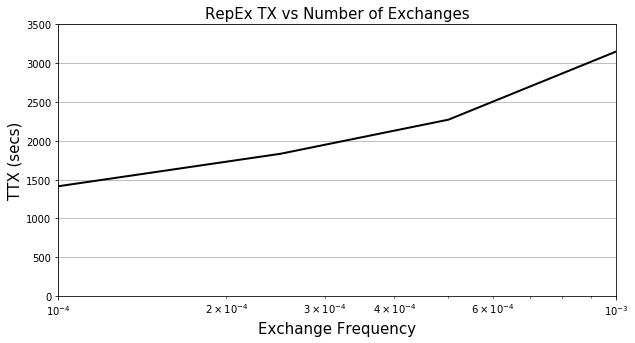

In [11]:
import os
import sys
import glob
import pprint
import radical.utils as ru
import radical.pilot as rp
import radical.entk as re
import radical.analytics as ra
import pickle
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np



sessionnames = [
               're.session.two.scm177.017720.0002', #10 exchanges/100,000 steps
               're.session.two.scm177.017720.0000', #25 exchanges/100,000 steps
               're.session.two.scm177.017719.0028', #50 exchanges/100,000 steps
               're.session.two.scm177.017719.0026', #100 exchanges/100,000 steps
                ]

ex_frequency = [0.0001, 0.00025, 0.0005, 0.001]

TTX = []  

wd = os.getcwd() 

#print wd

def gettimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)


    total                   = session.filter(etype='task', inplace=False)
    total_durations         = total.duration([re.states.SCHEDULED, re.states.DONE])
    TTX.append(total_durations)

for i in range(4):    
    gettimes(sessionnames[i])
    
    
x = np.asarray(ex_frequency)
t  = np.asarray(TTX)

fig=plt.figure(figsize=(10,5))
plt.grid(True)
plt.xscale('log',basex=10)
plt.title("RepEx TX vs Number of Exchanges",fontsize=15)
plt.axis([0.0001,0.001,0,3500])
plt.xlabel("Exchange Frequency", fontsize=15)
plt.ylabel("TTX (secs)", fontsize=15)
plt.plot(x , t, linewidth=2.0, color='k', label = 'TTX')

plt.show(fig)